In [15]:
import pickle
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [25]:
df = pd.read_csv("mi.csv")
df.head()

,alloy_name,Temp,Stress,n,r_asymm,EN_Pauling_asymm,E_GPa_asymm,G_GPa_asymm,K_GPa_asymm,VEC_avg,Tm_avg,Coh_E_avg,density_avg,miedema_enthaply
0,Ti0.9Al0.1V0.03,0.490887,0.49140,6.10,0.072693,0.061009,0.165674,0.170776,0.240278,0.214667,0.678436,0.701451,0.275900,-21.33
1,Ti0.9Al0.1V0.04,0.592710,0.24570,4.60,0.081953,0.063673,0.169736,0.172972,0.256914,0.215856,0.680128,0.702788,0.277583,-22.92
2,Ti0.3Al0.65W0.004Si0.007,0.475172,0.27027,7.30,0.085204,0.154608,0.495617,0.515231,0.462275,0.148044,0.383170,0.517271,0.166566,-41.99
3,Mg0.92Al0.04Ca0.03,0.304110,0.07371,6.67,0.198208,0.233347,0.236546,0.237039,0.397157,0.004489,0.213705,0.018773,0.003423,10.26
4,Ti0.9Al0.1V0.03,0.660591,0.14742,1.53,0.072693,0.061009,0.165674,0.170776,0.240278,0.214667,0.678436,0.701451,0.275900,-21.33


In [26]:
y_prop = "n"
feat_names = ["Temp","Stress", "r_asymm", "EN_Pauling_asymm", "E_GPa_asymm", "G_GPa_asymm", "K_GPa_asymm", "VEC_avg", "Tm_avg", "Coh_E_avg", "density_avg", "miedema_enthaply"]

X = df[feat_names]
y = df[y_prop]
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (105, 12)
Y shape: (105,)


In [27]:
rf_regressor = RandomForestRegressor(n_estimators= 100) 
k = 9  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

best_score = float('-inf')  # Initialize with negative infinity for R2
best_model = None

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_regressor.fit(X_train, y_train)
    
    score = rf_regressor.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_model = rf_regressor

print("Best R2 score:", best_score)

# Train the best model on the entire dataset
best_model.fit(X, y)

Best R2 score: 0.9835126691161501


RandomForestRegressor()

In [28]:
y_pred = best_model.predict(X)

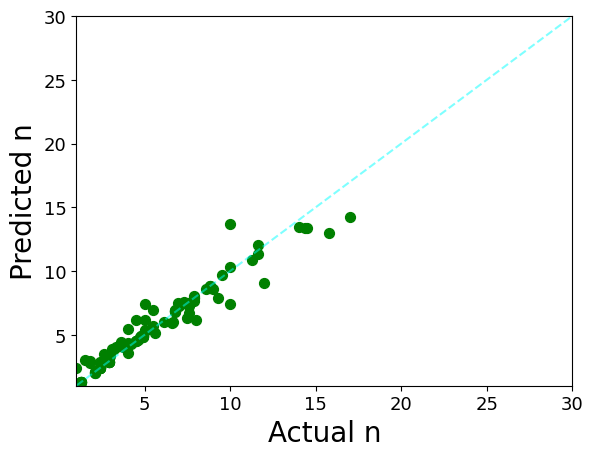

In [29]:
plt.scatter(y , y_pred, c = "green", s=50)
plt.plot([0, 30], [0, 30], "--", c="cyan", alpha=0.5)
plt.xlabel("Actual n", fontsize=20)
plt.ylabel("Predicted n", fontsize=20)
plt.xlim(1, 30)
plt.ylim(1, 30)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [30]:
import shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


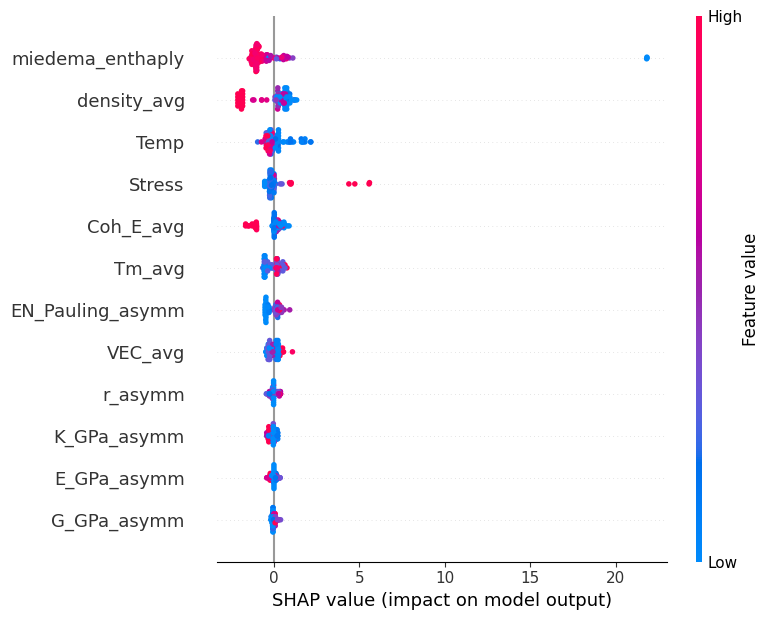

In [32]:
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type='dot')